### In this notebook, we show how to retrieve the Kasthuri graph

- Our graph is derived from RAMON Metadata, and so may differ slightly from that of the graph in the paper.  
- For a small percentage (2%) of the connections, we reassigned either neuron or synapse labels based on geometries 
 and paint information.


In [1]:
import numpy as np
import ndio.remote.neurodata as neurodata
import ndio.ramon as ramon
import time
import ndio
import networkx as nx
start = time.time()

token_synapse = 'kasthuri2015_ramon_v4'
channel_synapse = 'synapses'

token_neurons = 'kasthuri2015_ramon_v4'
channel_neurons = 'neurons'

res = 3

In [2]:
# Find all synapses

nd = neurodata()

id_synapse = nd.get_ramon_ids(token_synapse, channel_synapse, ramon_type=ramon.RAMONSynapse)
print len(id_synapse)

# An example synapse
s = nd.get_ramon_metadata(token_synapse, channel_synapse, [id_synapse[3]])[0]
vars(s)

1700


{'_status': 0,
 'author': 'unspecified',
 'confidence': 1.0,
 'cutout': None,
 'id': '4',
 'kvpairs': {'axonSynapseType': 'en-passant',
  'multiSynapseBouton': 'yes',
  'psdSize': '1393',
  'synapseLocation': 'spine',
  'vesicleCount': '281'},
 'resolution': 0,
 'segments': array([[1822,    2],
        [3832,    1]], dtype=uint32),
 'synapse_type': 0,
 'voxels': None,
 'weight': 0.0,
 'xyz_offset': (0, 0, 0)}

In [3]:
# Instantiate graph
is_directed = 0  # TODO:  directed doesn't work

if is_directed == False:  # undirected case
    G = nx.Graph()

else:
    G = nx.DiGraph()



In [4]:
# for each synapse 
c = 0 
for x in range(np.shape(id_synapse)[0]):
    c += 1
    print str(c).zfill(4),
    s = nd.get_ramon_metadata(token_synapse,channel_synapse,[id_synapse[x]])[0]
    
    # for each segment
    segments = s.segments[:,0]
    direction = s.segments[:,1]  # 1: axon/pre, 2: dendrite/post (see enumerated types)
    print direction
    if len(segments) != 2:
        raise('multiway synapses not implemented!')

    s1 = nd.get_ramon_metadata(token_neurons,channel_neurons,[segments[0]])[0]
    n1 = s1.neuron
    s2 = nd.get_ramon_metadata(token_neurons,channel_neurons,[segments[1]])[0]
    n2 = s2.neuron
                    
    if is_directed == False or (direction[0] == 1 and direction[1] == 0):  
        if G.has_edge(n1, n2): # edge already exists, increase weight
            G[n1][n2]['weight'] += 1
        else:
            # new edge. add with weight=1
            G.add_edge(n1, n2, weight=1)

    elif direction[0] == 1 and direction[1] == 0:
        if G.has_edge(n2, n1): # edge already exists, increase weight
            G[n1][n2]['weight'] += 1
        else:
            # new edge. add with weight=1
            G.add_edge(n2, n1, weight=1)
    else: 
        print('1 pre and 1 post synaptic partner are required for directed graph estimation.')
        raise

0001 [2 1]
0002 [2 1]
0003 [2 1]
0004 [2 1]
0005 [2 1]
0006 [2 1]
0007 [2 1]
0008 [2 1]
0009 [2 1]
0010 [2 1]
0011 [2 1]
0012 [2 1]
0013 [2 1]
0014 [1 2]
0015 [2 1]
0016 [2 1]
0017 [2 1]
0018 [1 2]
0019 [1 2]
0020 [2 1]
0021 [2 1]
0022 [2 1]
0023 [2 1]
0024 [2 1]
0025 [1 2]
0026 [2 1]
0027 [2 1]
0028 [1 2]
0029 [2 1]
0030 [2 1]
0031 [2 1]
0032 [2 1]
0033 [2 1]
0034 [2 1]
0035 [2 1]
0036 [2 1]
0037 [2 1]
0038 [1 2]
0039 [2 1]
0040 [2 1]
0041 [2 1]
0042 [1 2]
0043 [2 1]
0044 [2 1]
0045 [2 1]
0046 [2 1]
0047 [2 1]
0048 [1 2]
0049 [1 2]
0050 [2 1]
0051 [2 1]
0052 [2 1]
0053 [2 1]
0054 [2 1]
0055 [2 1]
0056 [2 1]
0057 [2 1]
0058 [2 1]
0059 [2 1]
0060 [1 2]
0061 [2 1]
0062 [2 1]
0063 [2 1]
0064 [2 1]
0065 [2 1]
0066 [2 1]
0067 [2 1]
0068 [2 1]
0069 [1 2]
0070 [1 2]
0071 [2 1]
0072 [2 1]
0073 [2 1]
0074 [2 1]
0075 [2 1]
0076 [2 1]
0077 [2 1]
0078 [2 1]
0079 [2 1]
0080 [2 1]
0081 [1 2]
0082 [2 1]
0083 [2 1]
0084 [2 1]
0085 [2 1]
0086 [1 2]
0087 [1 2]
0088 [1 2]
0089 [2 1]
0090 [2 1]
0091 [2 1]

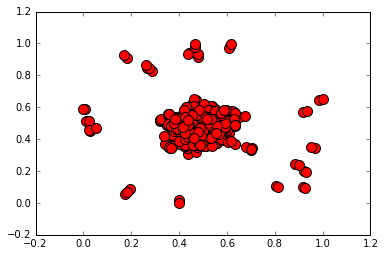

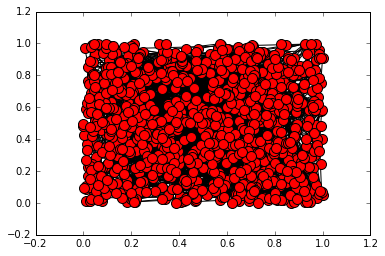

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

nx.draw_networkx(G, width=1, node_size = 100, with_labels=False, pos=nx.fruchterman_reingold_layout(G))#random_layout(G))# fruchterman_reingold_layout(G))
plt.show()
nx.draw_networkx(G, width=1, node_size = 100, with_labels=False, pos=nx.random_layout(G))#random_layout(G))
plt.show()

In [6]:
# Save graphml graph

nx.write_graphml(G, 'kasthuri2015_ramon_v4.graphml')


In [7]:
print '{} seconds elapsed.'.format(time.time()-start)

437.273367882 seconds elapsed.


In [8]:
#import itertools
#def choose(n,k):
#    return len(list(itertools.combinations(range(n),k)))

print direction

[2 1]
